In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## 1. Configure Inputs

In [33]:
#Select Image Id to process 
img_id = '12812436'

In [34]:
#with open("config.yml", "r") as ymlfile:
#    cfg = yaml.load(ymlfile, Loader=yaml.FullLoader)
#    
base_path = '../'

# data_path = base_path + "nutrition-lc-fr-country-fr-last-edit-date-2019-08"
# imgs_path = base_path + "tables_dataset/image_files/"
data_path = base_path + "results/"
imgs_path = data_path + "column_mask/"

img_name = img_id + '.nutrition.jpg'
path_to_input_image = imgs_path + img_name
path_to_input_image

'../results/column_mask/12812436.nutrition.jpg'

## 2. Process Image

### 2.1 Read Image

(256, 256, 3)

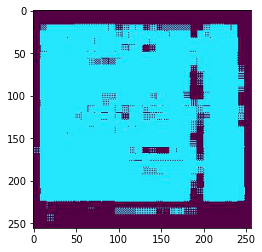

In [35]:
img = cv2.imread(path_to_input_image)
plt.imshow(img)
img.shape

### 2.2 Get Vertical Edges

In [36]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
mask = np.zeros((gray.shape),np.uint8)
# Définir le pas du kernal >20 pour que les lignes verticales soient plus accentuées 
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))

close = cv2.morphologyEx(gray,cv2.MORPH_CLOSE,kernel1)
div = np.float32(gray)/(close)
res = np.uint8(cv2.normalize(div,div,0,255,cv2.NORM_MINMAX))


### 2.3 Detect contours on edges

In [37]:
# Définir le x de ce kernel <10 pour avoir une séparation verticalement fine 
kernelx = cv2.getStructuringElement(cv2.MORPH_RECT,(2,10))

dx = cv2.Sobel(res,cv2.CV_16S,1,0)
dx = cv2.convertScaleAbs(dx)
cv2.normalize(dx,dx,0,255,cv2.NORM_MINMAX)
ret,close = cv2.threshold(dx,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
close = cv2.morphologyEx(close,cv2.MORPH_DILATE,kernelx,iterations = 1)

# contour, hier = cv2.findContours(close,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
# for cnt in contour:
#     x,y,w,h = cv2.boundingRect(cnt)
#     if h/w > 5:
#         cv2.drawContours(close,[cnt],0,255,-1)
#     else:
#         cv2.drawContours(close,[cnt],0,0,-1)
# closex = cv2.morphologyEx(close,cv2.MORPH_CLOSE,None,iterations = 2)
# closex = close.copy()

Text(0.5, 1.0, 'Vertical Edges')

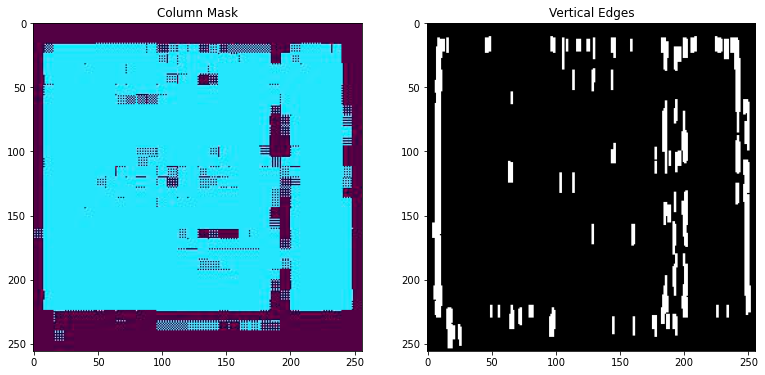

In [38]:
plt.figure(figsize=(20,30))
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Column Mask')#, plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(close,cmap = 'gray')
plt.title('Vertical Edges')#, plt.xticks([]), plt.yticks([])
#plt.subplot(133),plt.imshow(closex,cmap = 'gray')
#plt.title('Contours ')#, plt.xticks([]), plt.yticks([])

### 2.4 Detect Hough Lines on Contours

In [39]:
# edges = cv2.Canny(closex,50,150,apertureSize = 3)
# minLineLength = 100
# maxLineGap = 10
# lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
# for x1,y1,x2,y2 in lines[0]:
#     cv2.line(closex,(x1,y1),(x2,y2),(0,255,0),50)

# cv2.imwrite('houghlines5.jpg',img)


### 2.5 Peak Detection 

In [40]:
import matplotlib.pyplot as plt
import cv2
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import numpy as np
from sklearn.preprocessing import Normalizer

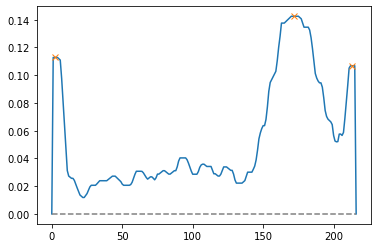

In [42]:
size = img.shape
width = size[0]
window_size=40

def moving_average(a, n) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
#Initialize input image = output of edges
gray = close

normalizer = Normalizer()
vertical_sum = gray.sum(axis=0)
vertical_sum_mv_avg = moving_average(vertical_sum,n=window_size)
vertical_sum_mv_avg_nm = normalizer.fit_transform([vertical_sum_mv_avg])[0]
vertical_sum_mv_avg_nm[0] = vertical_sum_mv_avg_nm[-1] = 0
variance = (vertical_sum_mv_avg_nm.std())

peaks, _ = find_peaks(vertical_sum_mv_avg_nm, prominence=variance)
plt.plot(vertical_sum_mv_avg_nm)
plt.plot(peaks, vertical_sum_mv_avg_nm[peaks], "x")
plt.plot(np.zeros_like(vertical_sum_mv_avg_nm), "--", color="gray")
plt.show()

In [43]:
import os

In [44]:
window_size//2

20

In [45]:
org_image = cv2.resize(plt.imread(os.path.join(data_path,'image/'+img_name)),(256,256))
for i,peak in enumerate(peaks):
    if i not in [0,len(peaks)-1]:
        cv2.line(org_image, pt1=(peak+(window_size//2),0), pt2=(peak+(window_size//2),256), color=(255,0,0), thickness=1)    

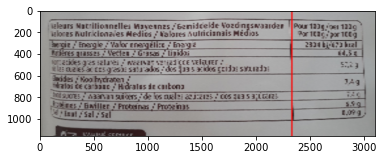

In [46]:
plt.imshow(cv2.resize(org_image,(3096, 1157)))

In [26]:
img = cv2.imread('../data/off_data/12812436.nutrition.jpg')

In [28]:
img.shape

(1157, 3096, 3)